# Загрузка данных

Материалы к этому ноутбуку:
 * [Астрономы составили трехмерную карту близких к Солнцу звезд и коричневых карликов](https://nplus1-ru.turbopages.org/nplus1.ru/s/news/2021/05/08/map-of-sun-neighbor)
 * [Каталог звёзд](https://gruze.org/10pc/)
 * [Трёхмерная модель](https://gruze.org/10pc/resources/)

In [1]:
import pandas as pd
import numpy as np

Читаем данные и удаляем из них данные о планетах, оставляем только звёзды.

In [2]:
df = pd.read_csv('The10pcSample.csv', sep=',', index_col='NB_OBJ')
df = df[df['OBJ_CAT'] != 'Planet']
df

,NB_SYS,SYSTEM_NAME,OBJ_CAT,OBJ_NAME,RA,DEC,EPOCH,PARALLAX,PARALLAX_ERROR,PARALLAX_BIBCODE,...,SYSTEM_BIBCODE,EXOPLANET_COUNT,GAIA_DR2,GAIA_EDR3,SIMBAD_NAME,COMMON_NAME,GJ,HD,HIP,COMMENT
NB_OBJ,,,,,,,,,,,,,,,,,,,,,
1,1,alf Cen,LM,Proxima Cen,217.392321,-62.676075,2016.0,768.066539,0.049873,2020yCat.1350....0G,...,2018A&A...615A.172M,1.0,Gaia DR2 5853498713160606720,Gaia EDR3 5853498713190525696,alf Cen C,Proxima Cen,GJ 551,NaN,HIP 70890,Proxima Cen c: candidate planet 2019ESS.....41...
3,1,alf Cen,*,alf Cen A,219.902058,-60.833993,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,2018A&A...615A.172M,NaN,NaN,NaN,alf Cen A,Rigil Kentaurus,GJ 559 A,HD 128620,HIP 71683,...
4,1,alf Cen,*,alf Cen B,219.896096,-60.837528,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,2018A&A...615A.172M,NaN,NaN,NaN,alf Cen B,Toliman,GJ 559 B,HD 128621,HIP 71681,...
5,2,Barnard's Star,LM,Barnard's Star,269.448503,4.739420,2016.0,546.975940,0.040116,2020yCat.1350....0G,...,NaN,NaN,Gaia DR2 4472832130942575872,Gaia EDR3 4472832130942575872,Barnard's Star,Barnard's Star,GJ 699,NaN,HIP 87937,Barnard's Star b: candidate planet 2018Natur.5...
6,3,Luhman 16,BD,Luhman 16 A,162.308644,-53.318045,2016.0,501.557000,0.082000,2018A&A...618A.111L,...,2013ApJ...767L...1L,NaN,Gaia DR2 5353626573555863424,Gaia EDR3 5353626573555863424,Luhman 16A,Luhman 16,NaN,NaN,NaN,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1012,WISE J094305.98+360723.5,BD,WISE J094305.98+360723.5,145.776141,36.122541,2015.4,97.100000,2.900000,2021ApJS..253....7K,...,NaN,NaN,NaN,NaN,WISE J094305.98+360723.5,NaN,NaN,NaN,NaN,No evidence for binarity in 2021ApJS..253....7...
1016,1013,2MASS J12373919+6526148,BD,2MASS J12373919+6526148,189.413318,65.437447,2000.0,96.070000,4.780000,2012ApJ...752...56F,...,NaN,NaN,NaN,NaN,2MASS J12373919+6526148,NaN,NaN,NaN,NaN,Could be EDR3 1680478217385666944 but seems to...
1017,1014,CWISEP J144606.62-231717.8,BD,CWISEP J144606.62-231717.8,221.526873,-23.288846,2017.0,95.600000,13.900000,2021ApJS..253....7K,...,NaN,NaN,NaN,NaN,CWISEP J144606.62-231717.8,NaN,NaN,NaN,NaN,...


# Координаты объектов

RA - Прямое восхождение в ICRS  
DEC - Склонение в ICRS  
PARALLAX - Параллакс

In [3]:
# Коэффициент параллакса (для колонки PARALLAX)
koef = 1000 * 180 * 3600 / np.pi
koef

206264806.24709636

Мера парсека: [https://ru.wikipedia.org/wiki/Парсек](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D1%81%D0%B5%D0%BA)

In [4]:
mera = 1 / np.tan(1000 / koef)
print(f'{mera} а.е./пк')

206264.80624548031 а.е./пк


In [5]:
# Перевод параллакса в парсеки
def radius(alfa):
    return 1 / (mera * np.tan(alfa / koef))

Система "Проксима Центавра"

In [6]:
print(f'Proxima Centauri = {radius(768.066539)} пк')

Proxima Centauri = 1.3019705314922108 пк


Перевод параллакса в парсеки (вычисление радиуса)

In [7]:
df['RADIUS'] = radius(df['PARALLAX'])
df['RADIUS']

NB_OBJ
1        1.301971
3        1.345895
4        1.345895
5        1.828234
6        1.993791
          ...    
1015    10.298661
1016    10.409077
1017    10.460251
1018    11.037528
1019    11.655012
Name: RADIUS, Length: 482, dtype: float64

Сферическая система координат: [https://ru.wikipedia.org/wiki/Сферическая_система_координат](https://ru.wikipedia.org/wiki/%D0%A1%D1%84%D0%B5%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82)  
Система небесных координат: [https://ru.wikipedia.org/wiki/Система_небесных_координат](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BD%D0%B5%D0%B1%D0%B5%D1%81%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82)

In [8]:
# Перевод из второй экваториальной системы координат в декартову (x, y, z)
def coordinates(df):
    beta = 2 * np.pi * (90 - df['DEC']) / 360
    gamma = 2 * np.pi * df['RA'] / 360
    df['X'] = df['RADIUS'] * np.sin(beta) * np.cos(gamma)
    df['Y'] = df['RADIUS'] * np.sin(beta) * np.sin(gamma)
    df['Z'] = df['RADIUS'] * np.cos(beta)
    return df

# Перевод из второй экваториальной системы координат в декартову с единичным радиусом
def coordinates_one(df):
    beta = 2 * np.pi * (90 - df['DEC']) / 360
    gamma = 2 * np.pi * df['RA'] / 360
    df['ONE_X'] = np.sin(beta) * np.cos(gamma)
    df['ONE_Y'] = np.sin(beta) * np.sin(gamma)
    df['ONE_Z'] = np.cos(beta)
    return df

In [9]:
coordinates(df)

,NB_SYS,SYSTEM_NAME,OBJ_CAT,OBJ_NAME,RA,DEC,EPOCH,PARALLAX,PARALLAX_ERROR,PARALLAX_BIBCODE,...,SIMBAD_NAME,COMMON_NAME,GJ,HD,HIP,COMMENT,RADIUS,X,Y,Z
NB_OBJ,,,,,,,,,,,,,,,,,,,,,
1,1,alf Cen,LM,Proxima Cen,217.392321,-62.676075,2016.0,768.066539,0.049873,2020yCat.1350....0G,...,alf Cen C,Proxima Cen,GJ 551,NaN,HIP 70890,Proxima Cen c: candidate planet 2019ESS.....41...,1.301971,-0.474816,-0.362923,-1.156704
3,1,alf Cen,*,alf Cen A,219.902058,-60.833993,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,alf Cen A,Rigil Kentaurus,GJ 559 A,HD 128620,HIP 71683,...,1.345895,-0.503177,-0.420752,-1.175251
4,1,alf Cen,*,alf Cen B,219.896096,-60.837528,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,alf Cen B,Toliman,GJ 559 B,HD 128621,HIP 71681,...,1.345895,-0.503165,-0.420653,-1.175291
5,2,Barnard's Star,LM,Barnard's Star,269.448503,4.739420,2016.0,546.975940,0.040116,2020yCat.1350....0G,...,Barnard's Star,Barnard's Star,GJ 699,NaN,HIP 87937,Barnard's Star b: candidate planet 2018Natur.5...,1.828234,-0.017537,-1.821898,0.151056
6,3,Luhman 16,BD,Luhman 16 A,162.308644,-53.318045,2016.0,501.557000,0.082000,2018A&A...618A.111L,...,Luhman 16A,Luhman 16,NaN,NaN,NaN,...,1.993791,-1.134709,0.361943,-1.598949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1012,WISE J094305.98+360723.5,BD,WISE J094305.98+360723.5,145.776141,36.122541,2015.4,97.100000,2.900000,2021ApJS..253....7K,...,WISE J094305.98+360723.5,NaN,NaN,NaN,NaN,No evidence for binarity in 2021ApJS..253....7...,10.298661,-6.878392,4.678739,6.071207
1016,1013,2MASS J12373919+6526148,BD,2MASS J12373919+6526148,189.413318,65.437447,2000.0,96.070000,4.780000,2012ApJ...752...56F,...,2MASS J12373919+6526148,NaN,NaN,NaN,NaN,Could be EDR3 1680478217385666944 but seems to...,10.409077,-4.268647,-0.707689,9.467138
1017,1014,CWISEP J144606.62-231717.8,BD,CWISEP J144606.62-231717.8,221.526873,-23.288846,2017.0,95.600000,13.900000,2021ApJS..253....7K,...,CWISEP J144606.62-231717.8,NaN,NaN,NaN,NaN,...,10.460251,-7.192969,-6.369818,-4.135635


In [10]:
coordinates_one(df)

,NB_SYS,SYSTEM_NAME,OBJ_CAT,OBJ_NAME,RA,DEC,EPOCH,PARALLAX,PARALLAX_ERROR,PARALLAX_BIBCODE,...,HD,HIP,COMMENT,RADIUS,X,Y,Z,ONE_X,ONE_Y,ONE_Z
NB_OBJ,,,,,,,,,,,,,,,,,,,,,
1,1,alf Cen,LM,Proxima Cen,217.392321,-62.676075,2016.0,768.066539,0.049873,2020yCat.1350....0G,...,NaN,HIP 70890,Proxima Cen c: candidate planet 2019ESS.....41...,1.301971,-0.474816,-0.362923,-1.156704,-0.364690,-0.278749,-0.888426
3,1,alf Cen,*,alf Cen A,219.902058,-60.833993,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,HD 128620,HIP 71683,...,1.345895,-0.503177,-0.420752,-1.175251,-0.373860,-0.312619,-0.873211
4,1,alf Cen,*,alf Cen B,219.896096,-60.837528,2000.0,743.000000,1.300000,2016A&A...586A..90P,...,HD 128621,HIP 71681,...,1.345895,-0.503165,-0.420653,-1.175291,-0.373852,-0.312545,-0.873241
5,2,Barnard's Star,LM,Barnard's Star,269.448503,4.739420,2016.0,546.975940,0.040116,2020yCat.1350....0G,...,NaN,HIP 87937,Barnard's Star b: candidate planet 2018Natur.5...,1.828234,-0.017537,-1.821898,0.151056,-0.009592,-0.996535,0.082624
6,3,Luhman 16,BD,Luhman 16 A,162.308644,-53.318045,2016.0,501.557000,0.082000,2018A&A...618A.111L,...,NaN,NaN,...,1.993791,-1.134709,0.361943,-1.598949,-0.569121,0.181535,-0.801964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1012,WISE J094305.98+360723.5,BD,WISE J094305.98+360723.5,145.776141,36.122541,2015.4,97.100000,2.900000,2021ApJS..253....7K,...,NaN,NaN,No evidence for binarity in 2021ApJS..253....7...,10.298661,-6.878392,4.678739,6.071207,-0.667892,0.454306,0.589514
1016,1013,2MASS J12373919+6526148,BD,2MASS J12373919+6526148,189.413318,65.437447,2000.0,96.070000,4.780000,2012ApJ...752...56F,...,NaN,NaN,Could be EDR3 1680478217385666944 but seems to...,10.409077,-4.268647,-0.707689,9.467138,-0.410089,-0.067988,0.909508
1017,1014,CWISEP J144606.62-231717.8,BD,CWISEP J144606.62-231717.8,221.526873,-23.288846,2017.0,95.600000,13.900000,2021ApJS..253....7K,...,NaN,NaN,...,10.460251,-7.192969,-6.369818,-4.135635,-0.687648,-0.608955,-0.395367


# Кластеризация

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
# Конвертировать координаты
def get_xyz(names):
    x = df[names[0]].to_numpy().reshape(-1, 1)
    y = df[names[1]].to_numpy().reshape(-1, 1)
    z = df[names[2]].to_numpy().reshape(-1, 1)
    return np.hstack([x, y, z])

In [13]:
inp = np.random.random((500, 3))
inp.shape

(500, 3)

In [14]:
inp = get_xyz(['X', 'Y', 'Z'])
inp = np.vstack((inp, [0, 0, 0]))
inp.shape

(483, 3)

Выполнение трансформации координат (x, y, z) -> (x, y)

In [15]:
# model = TSNE(n_components=2, init='random', metric='euclidean', method='exact', random_state=21)
model = TSNE(n_components=2, init='random', metric='euclidean', random_state=21)
inp_embedded = model.fit_transform(inp)
inp_embedded.shape

(483, 2)

Центр карты - Солнце  
Зелёным выделены 10 ближайших к Солнцу звёзд  
save.png

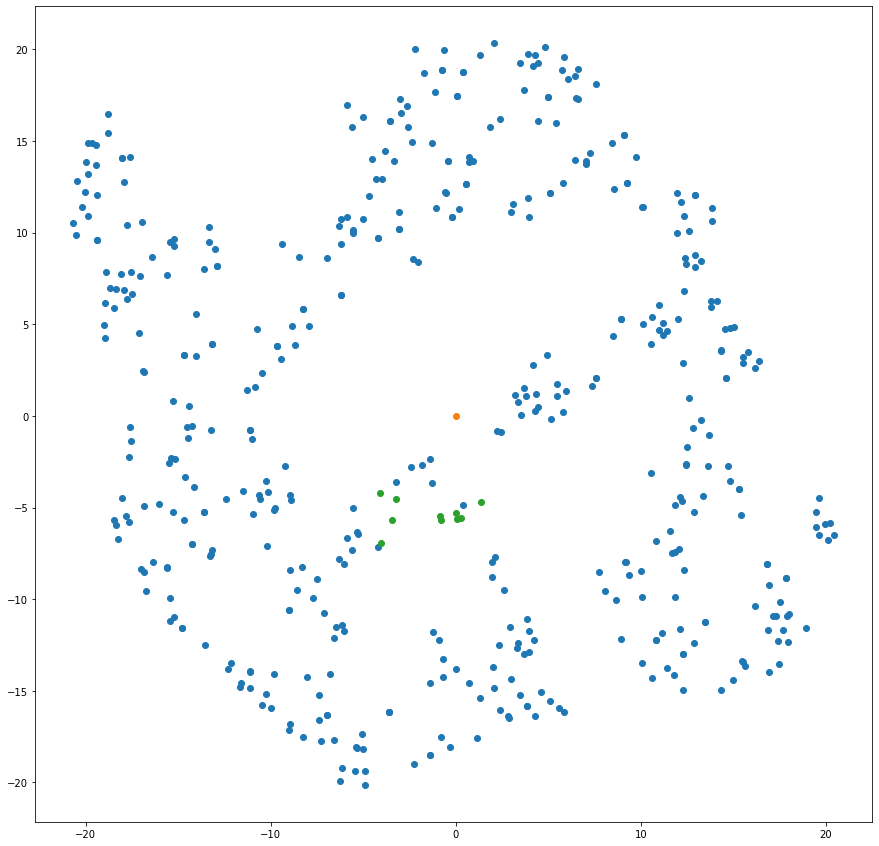

In [16]:
plt.figure(figsize=(15, 15))
plt.scatter(inp_embedded[10:, 0], inp_embedded[10:, 1])
plt.scatter(0, 0)
plt.scatter(inp_embedded[:10, 0], inp_embedded[:10, 1])
plt.savefig('save.png')
plt.show()

Карта с именами звёзд: save_txt.png

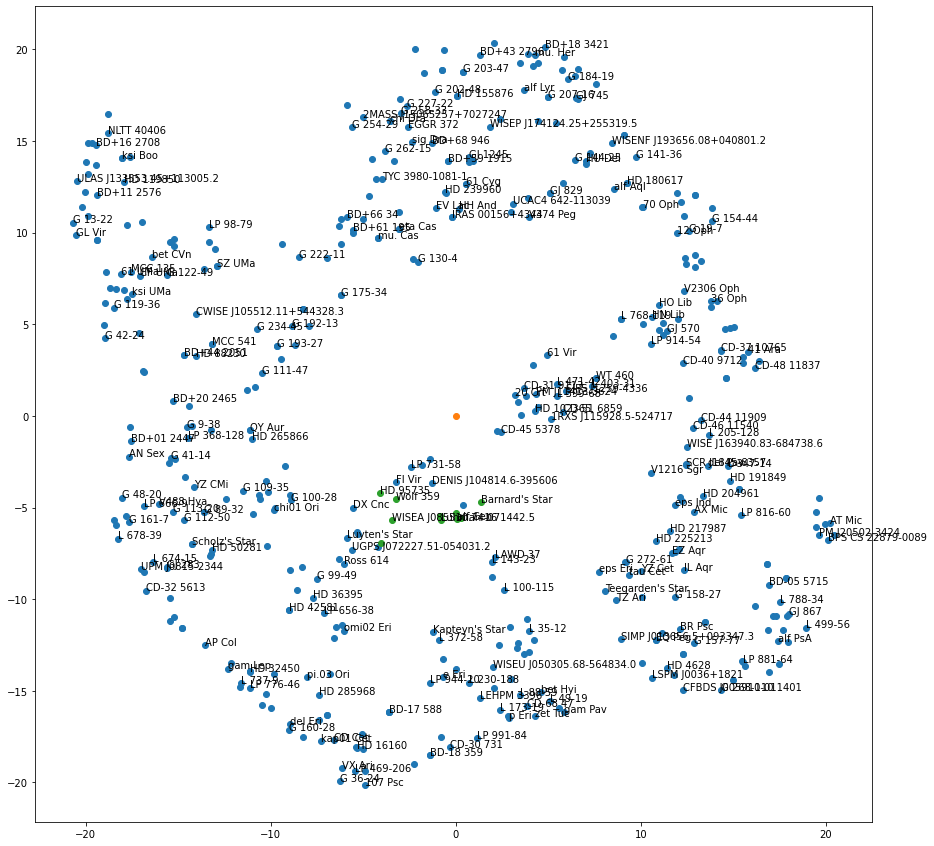

In [17]:
plt.figure(figsize=(15, 15))
plt.scatter(inp_embedded[10:, 0], inp_embedded[10:, 1])
plt.scatter(0, 0)
plt.scatter(inp_embedded[:10, 0], inp_embedded[:10, 1])
sys = set()
for ind, txt in enumerate(df['SYSTEM_NAME']):
    if not txt[:5] in sys:
        plt.annotate(txt, (inp_embedded[ind, 0], inp_embedded[ind, 1]))
    sys.add(txt[:5])
plt.savefig('save_txt.png')
plt.show()

# Кластеризация с единичным радиусом

In [18]:
inp = get_xyz(['ONE_X', 'ONE_Y', 'ONE_Z'])
inp = np.vstack((inp, [0, 0, 0]))
inp.shape

(483, 3)

Выполнение трансформации координат (x, y, z) -> (x, y)

In [19]:
model = TSNE(n_components=2, init='random', metric='euclidean', method='exact', random_state=21)
# model = TSNE(n_components=2, init='random', metric='euclidean', random_state=21)
inp_one = model.fit_transform(inp)

In [20]:
radius_max = np.amax(inp_one, axis=0)
radius_max

array([22.541576, 18.229105], dtype=float32)

Операция приведения радиуса. Максимум = около 10МПк.

In [21]:
radius = df['RADIUS'].to_numpy()
radius = np.append(radius, [0]).reshape(1, -1)
print(radius.shape)
inp_one[:, 0] = (inp_one[:, 0] / radius_max[0]) * radius
inp_one[:, 1] = (inp_one[:, 1] / radius_max[1]) * radius
print(inp_one.shape)

(1, 483)
(483, 2)


Центр карты - Солнце  
Зелёным выделены 10 ближайших к Солнцу звёзд  
one_save.png

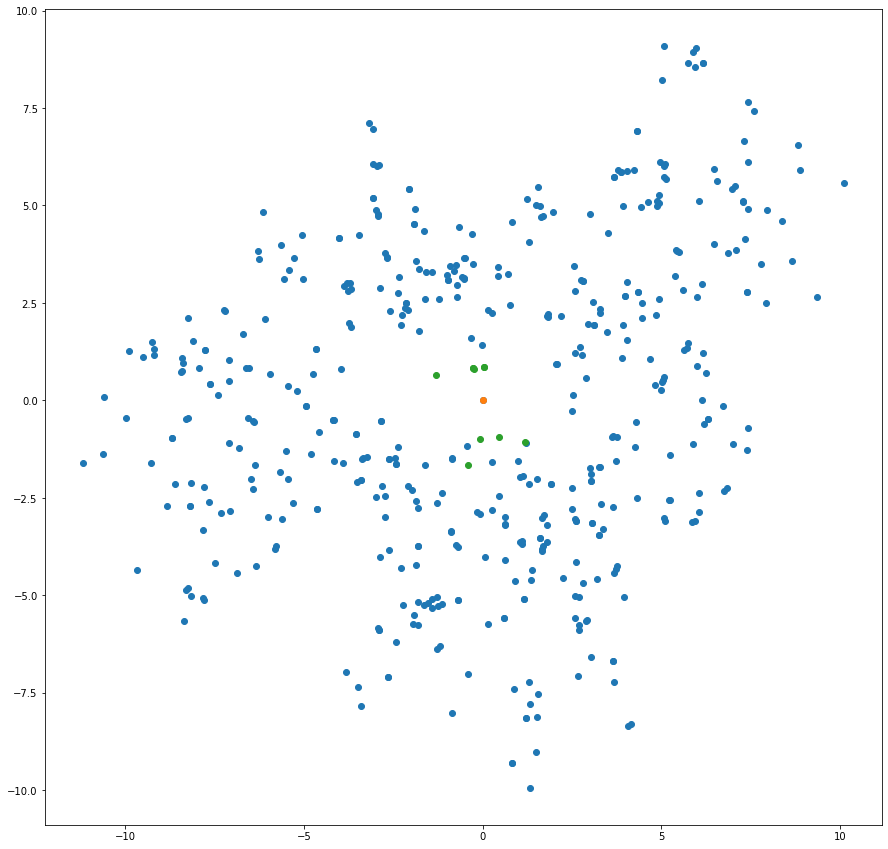

In [22]:
plt.figure(figsize=(15, 15))
plt.scatter(inp_one[10:, 0], inp_one[10:, 1])
plt.scatter(0, 0)
plt.scatter(inp_one[:10, 0], inp_one[:10, 1])
plt.savefig('one_save.png')
plt.show()

Карта с именами звёзд: one_save_txt.png

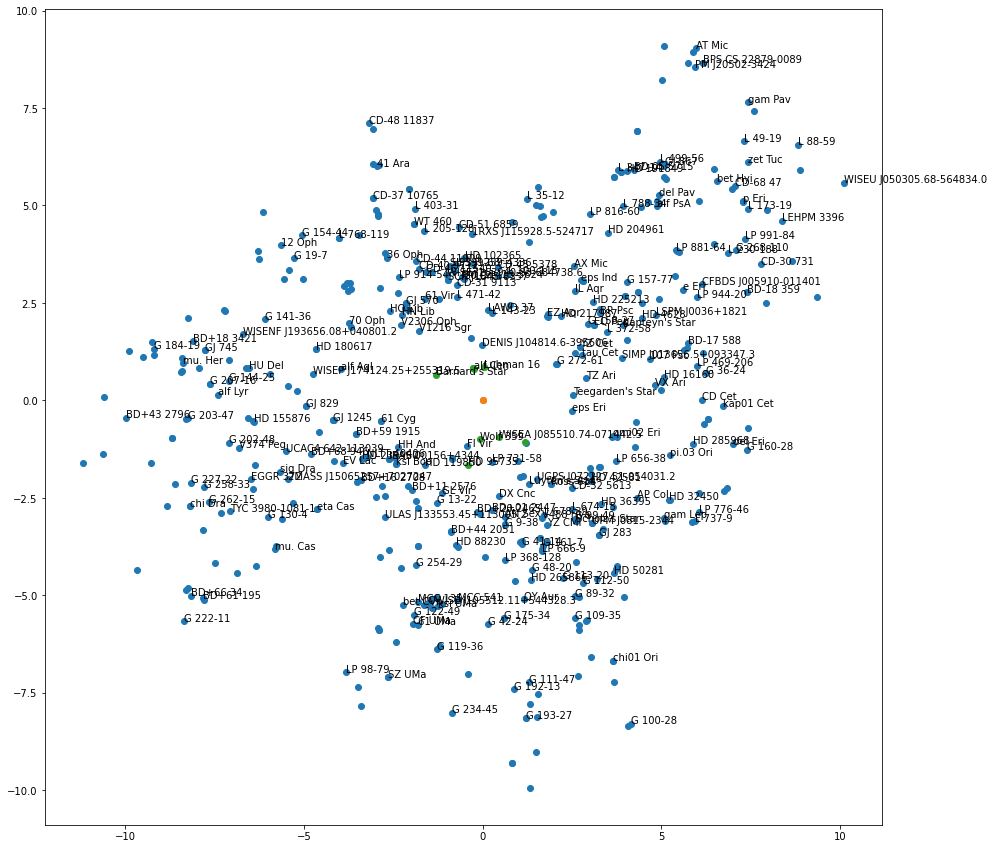

In [23]:
plt.figure(figsize=(15, 15))
plt.scatter(inp_one[10:, 0], inp_one[10:, 1])
plt.scatter(0, 0)
plt.scatter(inp_one[:10, 0], inp_one[:10, 1])
sys = set()
for ind, txt in enumerate(df['SYSTEM_NAME']):
    if not txt[:5] in sys:
        plt.annotate(txt, (inp_one[ind, 0], inp_one[ind, 1]))
    sys.add(txt[:5])
plt.savefig('one_save_txt.png')
plt.show()

# Сохранение

(2D_X, 2D_Y) - Координаты звёзд на плоскости  
(2D_ONE_X, 2D_ONE_Y) - Координаты звёзд на плоскости (на основе единичного радиуса)

In [24]:
new_df = df.copy()
new_df['2D_X'] = inp_embedded[:-1, 0]
new_df['2D_Y'] = inp_embedded[:-1, 1]
new_df['2D_ONE_X'] = inp_one[:-1, 0]
new_df['2D_ONE_Y'] = inp_one[:-1, 1]
new_df.to_csv('out.csv', sep=';', header=True)